In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Capstone Codebase

/content/drive/MyDrive/Capstone Codebase


In [17]:
import numpy as np
import dynamic_rebalancing as dr
from user import User

def run(start_date, end_date):
    # Control rebalancing frequency and amount of data to use
    rebalancing_freq = 'M'  # 'Q' or 'M'
    rebalancing_window = 3

    # Control the regression method used and the factor model used
    regression_method = 'OLS'  # 'LASSO', 'Ridge', 'OLS' or 'LSTM'
    factor_model = 'Carhart'  # 'CAPM', 'Fama_French_3_factors', 'Fama_French_5_factors', 'Carhart', or 'PCA'.

    regime_window = 30  # Number of days to use in regime weighted average

    # Settings
    overwrite_asset_allocation = False  # Overwrite the allocation selected by regime detection
    allow_dynamic_asset_rebalancing = True  # Allow asset allocation to switch
    regime_detection = True  # Enable regime detection to change risk level. If False, use overwritten_regime_detection
    track_return_goal = True  # Enable return goal to make changes to risk level of portfolio
    enforce_allocation = True  # F: Remove all constraints on allocation by asset class

    # Control cardinality and transaction costs
    cardinality = False
    transaction_costs = True

    # Overwritten settings
    overwritten_regime_detection = ('nothing', 2, 'CVaR')  # Overwritten regime detection response. ONLY FOR EVAL USE
    overwritten_asset_allocation = {
        'alternatives': 0.,
        'bonds': 0.3,
        'commodities': 0.,
        'equity_etfs': 0.,
        'reit': 0.,
        'individual_stocks': 0.7
    }

    # Input overwritten allocation vector for bactest, will only be used if overwrite_asset_allocation = True
    b = list(overwritten_asset_allocation.values())
    b = np.array(b)

    # Create user
    person = User(risk_level=2, concentration=2, time_horizon=5, return_goal=0.3)

    # Run backtest to generate portfolio
    port = dr.run_simulation_dynamic(start_date, end_date, rebalancing_freq, rebalancing_window, person,
                                     factor_model, regression_method, min_days_between_rebalance=40,
                                     overwrite_allocation=overwrite_asset_allocation,
                                     overwritten_allocation=b,
                                     allow_dynamic_asset_rebalancing=allow_dynamic_asset_rebalancing, reduced_data=True,
                                     cardinality=cardinality, transaction_costs=transaction_costs,
                                     regime_window=regime_window, regime_detection=regime_detection,
                                     overwritten_regime_detection=overwritten_regime_detection,
                                     track_return_goal=track_return_goal, enforce_allocation=enforce_allocation)

    # Print portfolio Sharpe Ratio and Turnover
    port_SR, port_turnover, MDD = port.get_performance_statistics()
    print("SR, Turnover, and MDD: {:.2f}%, {:.2f}%, {:.2f}%".format(100 * port_SR, 100 * port_turnover, 100 * MDD))

    # Print portfolio total return
    print("Total return: {:.2f}%".format(100 * (port.value[-1] / port.value[0] - 1)))

    # Plot regimes throughout backtest
    dr.plot_regimes(port.regime_dates, port.regimes)

    # Compare resuts against portfolio that is 30% BND 70% SPY
    # NOTE: BND only exists since 2008, if you want to backtest further back than that, remove this line and use
    # port.plot_value()
    dr.compare_results(port, start_date, end_date, allocation=np.array([0.3, 0.7]))

def backtest_1():
    start_date = '2007-12-31'
    end_date = '2011-12-31'

    run(start_date, end_date)


def backtest_2():
    start_date = '2012-12-31'
    end_date = '2016-12-31'

    run(start_date, end_date)

if __name__ == '__main__':
    # backtest_1()
    backtest_2()

/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  times = pd.date_range(start=t_start, end=t_end, freq=rebalancing_freq, inclusive='both')


Training start : Training end : Test start : Test end
2012-10-02 2012-12-31 2012-12-31 2016-12-31
{'alternatives': 1, 'bonds': 6, 'commodities': 2, 'equity_etfs': 14, 'reit': 10, 'individual_stocks': 101}


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r

Initial weights found, portfolio initialized


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2012-11-12 00:00:00 2013-02-10 2013-02-28 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 1.63%
Fraction complete: 2.74%
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2012-12-31 00:00:00 2013-03-31 2013-04-30 00:00:00
days since last rebalance:  49
Fraction of return constraint met: 2.80%
Fraction complete: 6.10%
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2013-03-02 00:00:00 2013-05-31 2013-06-28 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 3.26%
Fraction complete: 10.28%
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2013-05-02 00:00:00 2013-07-31 2013-08-30 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 4.20%
Fraction complete: 14.46%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2013-06-11 00:00:00 2013-09-09 2013-09-30 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 3.70%
Fraction complete: 17.20%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2013-07-21 00:00:00 2013-10-19 2013-10-31 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 5.41%
Fraction complete: 19.95%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2013-09-01 00:00:00 2013-11-30 2013-12-31 00:00:00
days since last rebalance:  42
Fraction of return constraint met: 6.03%
Fraction complete: 22.82%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2013-11-02 00:00:00 2014-01-31 2014-02-28 00:00:00
days since last rebalance:  62
Fraction of return constraint met: 5.81%
Fraction complete: 27.07%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2013-12-31 00:00:00 2014-03-31 2014-04-30 00:00:00
days since last rebalance:  59
Fraction of return constraint met: 7.69%
Fraction complete: 31.12%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2014-03-02 00:00:00 2014-05-31 2014-06-30 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 8.90%
Fraction complete: 35.30%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2014-05-02 00:00:00 2014-07-31 2014-08-29 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 8.56%
Fraction complete: 39.48%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2014-07-02 00:00:00 2014-09-30 2014-10-31 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 8.49%
Fraction complete: 43.66%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2014-09-01 00:00:00 2014-11-30 2014-12-31 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 10.84%
Fraction complete: 47.84%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2014-10-12 00:00:00 2015-01-10 2015-01-30 00:00:00
days since last rebalance:  41
Fraction of return constraint met: 10.64%
Fraction complete: 50.65%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2014-11-21 00:00:00 2015-02-19 2015-02-27 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 11.89%
Fraction complete: 53.39%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2014-12-31 00:00:00 2015-03-31 2015-04-30 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 11.69%
Fraction complete: 56.13%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2015-03-02 00:00:00 2015-05-31 2015-06-30 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 11.41%
Fraction complete: 60.32%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2015-05-02 00:00:00 2015-07-31 2015-08-31 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 10.79%
Fraction complete: 64.50%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2015-06-11 00:00:00 2015-09-09 2015-09-30 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 7.56%
Fraction complete: 67.24%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2015-07-21 00:00:00 2015-10-19 2015-10-30 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 9.47%
Fraction complete: 69.98%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2015-08-30 00:00:00 2015-11-28 2015-11-30 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 10.24%
Fraction complete: 72.72%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2015-10-09 00:00:00 2016-01-07 2016-01-29 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 7.18%
Fraction complete: 75.46%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2015-11-18 00:00:00 2016-02-16 2016-02-29 00:00:00
days since last rebalance:  40
Fraction of return constraint met: 6.18%
Fraction complete: 78.20%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792, 0.02653898584995129]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2016-01-01 00:00:00 2016-03-31 2016-04-29 00:00:00
days since last rebalance:  44
Fraction of return constraint met: 10.49%
Fraction complete: 81.22%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792, 0.02653898584995129, 0.010293775999640736]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2016-03-02 00:00:00 2016-05-31 2016-06-30 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 11.22%
Fraction complete: 85.40%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792, 0.02653898584995129, 0.010293775999640736, 0.027331980283615685]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2016-05-02 00:00:00 2016-07-31 2016-08-31 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 13.47%
Fraction complete: 89.58%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792, 0.02653898584995129, 0.010293775999640736, 0.027331980283615685, 0.020467483078887662]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2016-07-02 00:00:00 2016-09-30 2016-10-31 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 13.17%
Fraction complete: 93.76%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792, 0.02653898584995129, 0.010293775999640736, 0.027331980283615685, 0.020467483078887662, 0.02314904169574966]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r


Training start : Period start : Period end
2016-09-01 00:00:00 2016-11-30 2016-12-30 00:00:00
days since last rebalance:  61
Fraction of return constraint met: 13.36%
Fraction complete: 97.94%
Return not tracking goal, increase risk level to compensate
New optimization method: MVO, New risk level: 3
[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792, 0.02653898584995129, 0.010293775999640736, 0.027331980283615685, 0.020467483078887662, 0.02314904169574966, 0.04693210011467946]


/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  regime = adjusted_regime(int(regime_data['regime']))
/content/drive/MyDrive/Capstone Codebase/dynamic_rebalancing.py:483: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  r

[0, 0.40000002833081694, 0.017563296883467357, 0.009279857507413797, 0.04024716715415337, 0.008281622028364778, 0.007274285288276443, 0.01874686776272294, 0.016099165041236273, 0.010831037855068034, 0.01393420075106399, 0.01479638379399055, 0.011971186414102455, 0.04146788396405124, 0.011856012806993207, 0.020592992588647566, 0.016868066161211434, 0.006744931799543869, 0.019421725702001947, 0.03277534716935184, 0.009057448603053695, 0.019364958162513164, 0.013683277851629792, 0.02653898584995129, 0.010293775999640736, 0.027331980283615685, 0.020467483078887662, 0.02314904169574966, 0.04693210011467946, 0.0]
1461 1461 1461
Portfolio performance saved to portfolio_performance.csv.
1460
SR, Turnover, and MDD: 77.31%, 1.91%, -15.11%
Total return: 38.75%
Index return: 36.62%
Comparison results saved to comparison_results.csv.


In [11]:
import pandas as pd
import numpy as np

portfolio_values_list = pd.read_csv("comparison_results.csv")["Index Value"]
portfolio_values = pd.Series(portfolio_values_list)

daily_returns = portfolio_values.pct_change().dropna()


annualized_return = np.mean(daily_returns) * 252
annualized_std = np.std(daily_returns) * np.sqrt(252)
risk_free_rate = 0.00

sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std

print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")

cumulative_return = (1 + daily_returns).cumprod()
rolling_max = cumulative_return.cummax()
drawdown = cumulative_return / rolling_max - 1
max_drawdown = drawdown.min()

print(f"Maximum Drawdown: {max_drawdown:.2%}")

Annualized Sharpe Ratio: 0.9217
Maximum Drawdown: -9.96%


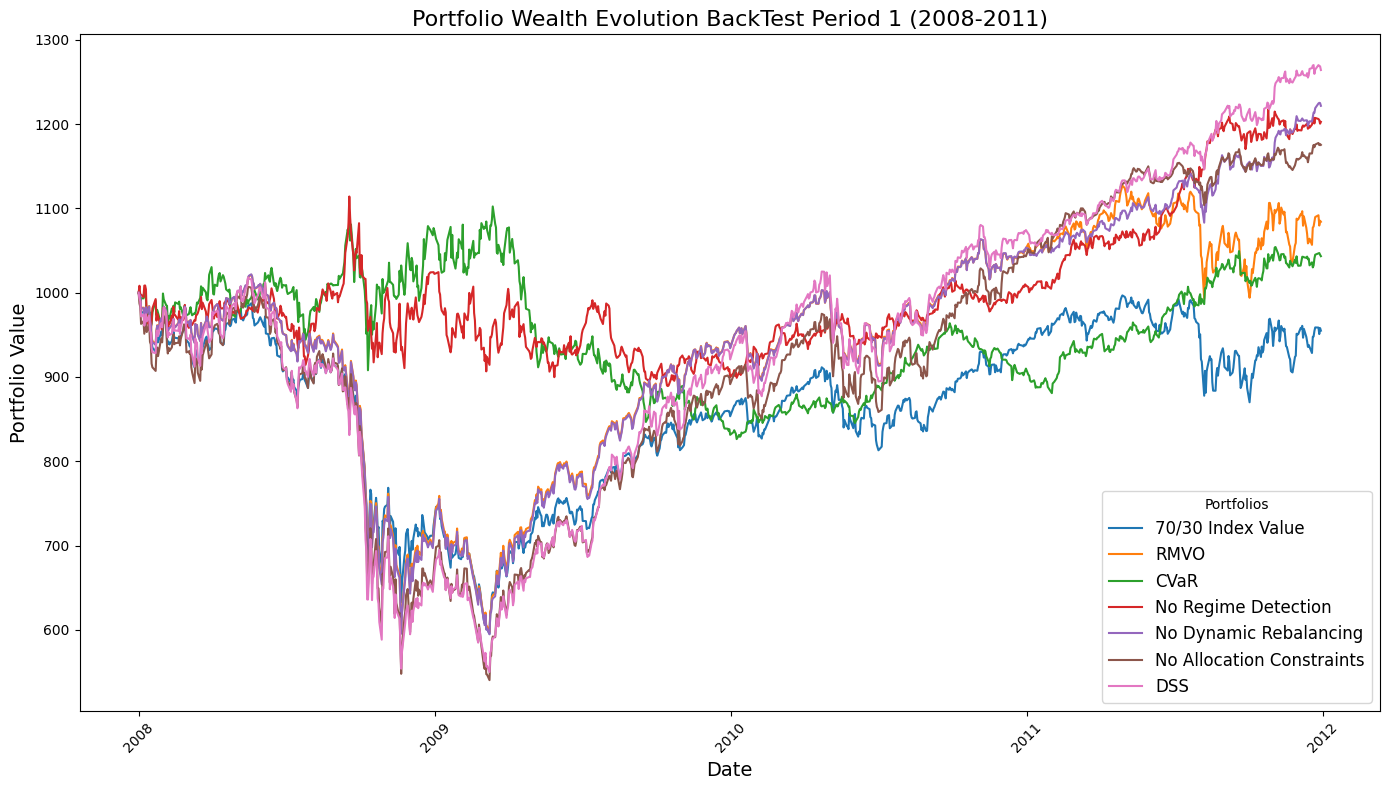

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and prepare data
merged_data = pd.read_csv('back_test_1.csv')

# Interpolate missing data
merged_data_filled = merged_data.copy()
merged_data_filled.iloc[:, 1:] = merged_data_filled.iloc[:, 1:].interpolate(
    method='linear', limit_direction='forward', axis=0
)

# Convert 'Time' column to datetime if not already
merged_data_filled['Time'] = pd.to_datetime(merged_data_filled['Time'])

# Plotting
plt.figure(figsize=(14, 8))
for column in merged_data_filled.columns[1:]:
    plt.plot(merged_data_filled['Time'], merged_data_filled[column], label=column)

plt.title("Portfolio Wealth Evolution BackTest Period 1 (2008-2011)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Portfolio Value", fontsize=14)

# Remove background and grid
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.grid(False)

# Set x-axis ticks to show only the years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

# Position the legend at the bottom right
plt.legend(title="Portfolios", fontsize=12, loc='lower right')

plt.tight_layout()
plt.savefig('backtest_1.png', dpi=300)
plt.show()


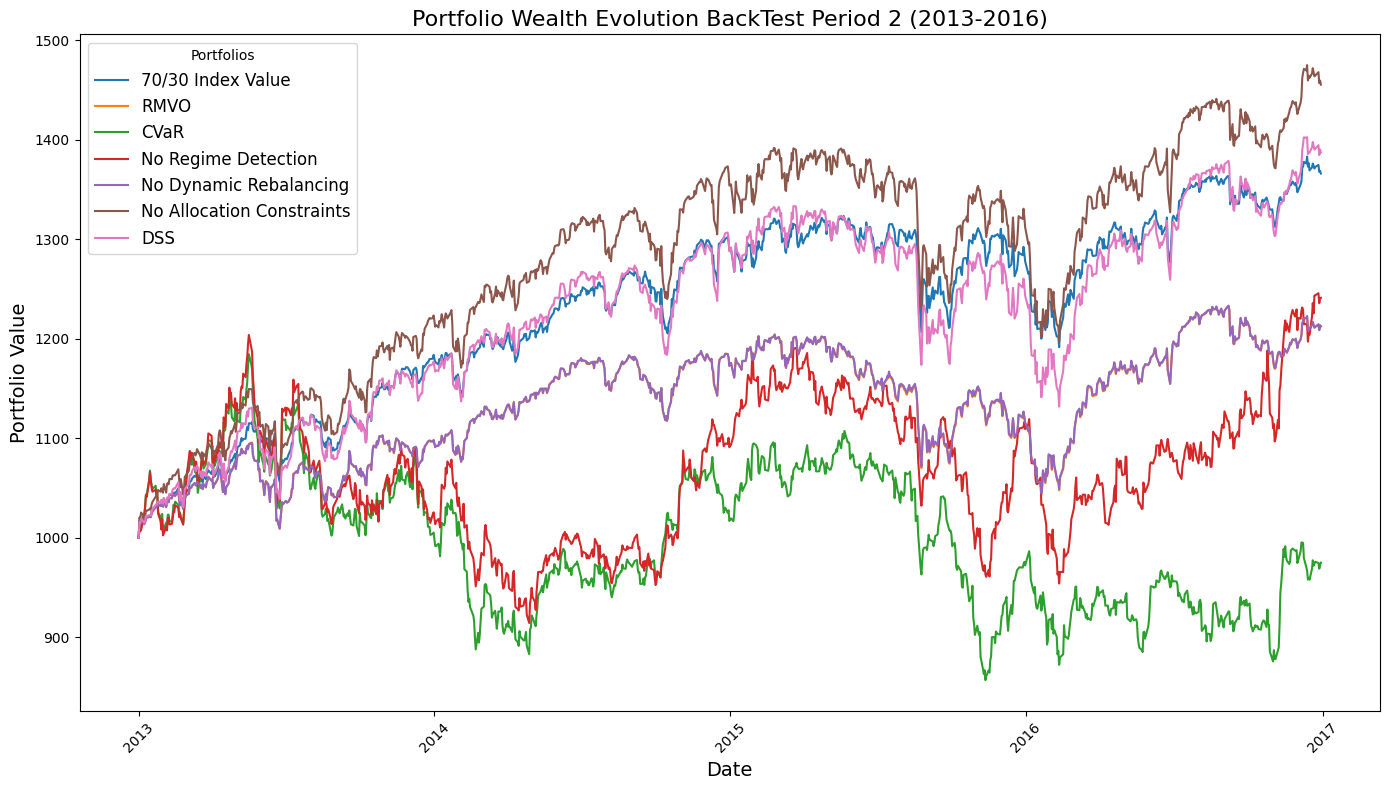

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and prepare data
merged_data = pd.read_csv('backtest2.csv')

# Interpolate missing data
merged_data_filled = merged_data.copy()
merged_data_filled.iloc[:, 1:] = merged_data_filled.iloc[:, 1:].interpolate(
    method='linear', limit_direction='forward', axis=0
)

# Convert 'Time' column to datetime if not already
merged_data_filled['Time'] = pd.to_datetime(merged_data_filled['Time'])

# Plotting
plt.figure(figsize=(14, 8))
for column in merged_data_filled.columns[1:]:
    plt.plot(merged_data_filled['Time'], merged_data_filled[column], label=column)

plt.title("Portfolio Wealth Evolution BackTest Period 2 (2013-2016)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Portfolio Value", fontsize=14)

# Remove background and grid
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.grid(False)

# Set x-axis ticks to show only the years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

# Position the legend at the bottom right
plt.legend(title="Portfolios", fontsize=12, loc='upper left')

plt.tight_layout()
plt.savefig('backtest_2.png', dpi=300)
plt.show()


In [ ]:
import pandas as pd
import numpy as np


merged_data = pd.read_csv('merged_portfolio_with_all_dates.csv')

merged_data_filled = merged_data.fillna(method='ffill')

def calculate_max_drawdown(values):
    """
    Calculate the maximum drawdown of a time series.
    :param values: Portfolio values as a numpy array or pandas series
    :return: Maximum drawdown value
    """
    cumulative_max = np.maximum.accumulate(values)
    drawdown = (values - cumulative_max) / cumulative_max
    return drawdown.min()

max_drawdowns = {}
for column in merged_data_filled.columns[1:]:
    portfolio_values = merged_data_filled[column].values
    max_drawdowns[column] = calculate_max_drawdown(portfolio_values)

max_drawdown_df = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=['Max Drawdown'])

max_drawdown_df.to_csv('max_drawdown_results_filled.csv')

print(max_drawdown_df)

                          Max Drawdown
CVaR                         -0.218832
DSS                          -0.266533
MVO                          -0.342677
No Allocation Constraint     -0.297335
No Dynamic Rebalancing       -0.263034
No Regime Detection          -0.325495


<ipython-input-4-acfff8dcc7a4>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data_filled = merged_data.fillna(method='ffill')


In [ ]:
merged_data_filled

,Time,CVaR,DSS,MVO,No Allocation Constraint,No Dynamic Rebalancing,No Regime Detection
0,2007-12-31,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,2008-02-09,1000.000000,948.428410,1000.000000,928.968838,957.411390,1000.000000
2,2008-03-20,1000.000000,945.155030,1000.000000,921.987291,954.117607,1000.000000
3,2008-03-31,1005.997931,945.155030,956.837923,921.987291,954.117607,952.190642
4,2008-04-29,1005.997931,982.248947,956.837923,975.320615,987.531511,952.190642
5,2008-06-08,1005.997931,980.447449,956.837923,967.388158,995.796849,952.190642
6,2008-06-30,994.945470,980.447449,948.128020,967.388158,995.796849,934.393344
7,2008-07-18,994.945470,905.495339,948.128020,898.012658,936.357375,934.393344
8,2008-08-27,994.945470,926.837693,948.128020,907.815494,934.950060,934.393344
9,2008-09-30,1070.758607,926.837693,859.141743,907.815494,934.950060,865.168995
